In [4]:
# %load ./utils/samples.py
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined = np.vstack((X_train, X_test))
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn算法中的距离度量计算公式为：

$$d(x^{(i)}, x^{(j)}) = \sqrt[p]{\sum\limits_k |x^{(i)}_k - x^{(j)}_k|^p}$$

参数$p=2$为欧几里得距离，$p=1$为曼哈顿距离

In [6]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

d:\Code\Python\Python_Machine_Learning_Code\3.sklearn\utils\plot_decision_regions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


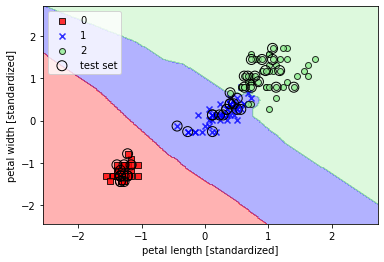

In [8]:
from utils.plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

**维数诅咒**

因为维数诅咒，KNN易于过拟合。

当固定规模的训练集的维数越来越大时，特征空间变得越来越稀疏，这种现象被称为维数诅咒。

直观的说，可以认为即使是最近邻的邻居在高维空间的距离也很远，以至于无法合适地估计。

决策树与KNN不适用正则化方法，但可以使用*特征选择*和*降维技术*来避免维数诅咒